In [103]:
# Konsep Decision Tree
# Implementasi Project menggunakan Decision Tree
# Step by step langkah pengerjaan. (Deskripsi langkah pengerjaan, jelaskan analisis atau insight, dan hasil yang anda dapatkan di setiap langkah pengerjaan)
# Kesimpulan (Hasil akhir project dan saran perbaikan)
# Referensi Pengerjaan

# About Decision Trees

adfadf 

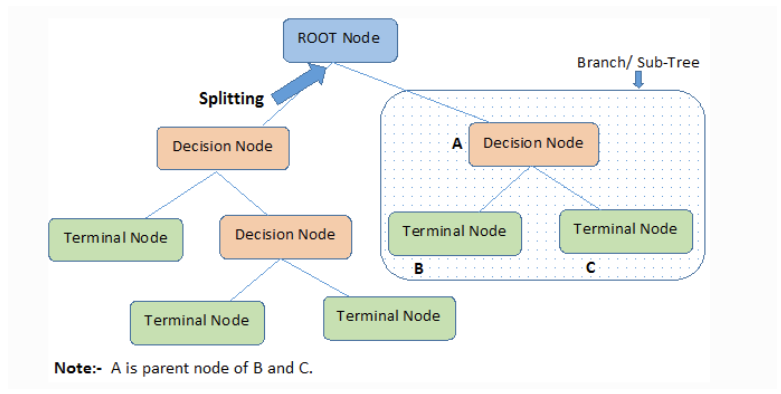

# Dependencies

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

# Reading Available Data

In [138]:
data = pd.read_csv("drug200.csv")

print("size of data:", len(data), "rows")
data.head()

size of data: 200 rows


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Preprocessing

In [141]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [143]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [148]:
print("Unique value for feature 'Sex'         :", data["Sex"].unique())
print("Unique value for feature 'BP'          :", data["BP"].unique())
print("Unique value for feature 'Cholesterol' :", data["Cholesterol"].unique())

Unique value for feature 'Sex'         : ['F' 'M']
Unique value for feature 'BP'          : ['HIGH' 'LOW' 'NORMAL']
Unique value for feature 'Cholesterol' : ['HIGH' 'NORMAL']


In [119]:
processed = data

processed["Sex"] = np.where(processed["Sex"]=="M",1,0)
processed["BP"] = np.where(processed["BP"]=="HIGH",2,processed["BP"])
processed["BP"] = np.where(processed["BP"]=="NORMAL",1,processed["BP"])
processed["BP"] = np.where(processed["BP"]=="LOW",0,processed["BP"])
processed["Cholesterol"] = np.where(processed["Cholesterol"]=="HIGH",1,0)

processed.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,1,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,0.5,1,7.798,drugX
4,61,0,0,1,18.043,drugY


# Balancing Data

In [120]:
splitted = processed
randomSetting = 2023

drugA = len(splitted[splitted["Drug"]=="drugA"])
drugB = len(splitted[splitted["Drug"]=="drugB"])
drugC = len(splitted[splitted["Drug"]=="drugC"])
drugX = len(splitted[splitted["Drug"]=="drugX"])
drugY = len(splitted[splitted["Drug"]=="drugY"])
minClass = min(drugA,drugB,drugC,drugX,drugY)

print("    Initial Data    ")
print("====================")
print("amount of drug A:", drugA)
print("amount of drug B:", drugB)
print("amount of drug C:", drugC)
print("amount of drug X:", drugX)
print("amount of drug Y:", drugY)
print()
print("Lowest Number of Class:", minClass)

    Initial Data    
amount of drug A: 23
amount of drug B: 16
amount of drug C: 16
amount of drug X: 54
amount of drug Y: 91

Lowest Number of Class: 16


## Direct Splitting

In [153]:
training, testing = train_test_split(splitted, test_size=0.2, random_state=randomSetting)

print("New Data Distribution:")
print("==========================")
print("Number of Drug A Rows:", drugA)
print("Number of Drug B Rows:", drugB)
print("Number of Drug C Rows:", drugC)
print("Number of Drug X Rows:", drugX)
print("Number of Drug Y Rows:", drugY)
print()
print("Training Rows:", len(training))
print("Testing Rows :", len(testing))
print("Total Rows   :", len(training) + len(testing))

New Data Distribution:
Number of Drug A Rows: 23
Number of Drug B Rows: 16
Number of Drug C Rows: 16
Number of Drug X Rows: 54
Number of Drug Y Rows: 91

Training Rows: 160
Testing Rows : 40
Total Rows   : 200


# Splitting w/ Balanced Class

In [154]:
drugAdf = splitted[splitted['Drug']=="drugA"].copy()
drugBdf = splitted[splitted['Drug']=="drugB"].copy()
drugCdf = splitted[splitted['Drug']=="drugC"].copy()
drugXdf = splitted[splitted['Drug']=="drugX"].copy()
drugYdf = splitted[splitted['Drug']=="drugY"].copy()

drugAdf = drugAdf.sample(n=minClass, random_state=randomSetting)
drugBdf = drugBdf.sample(n=minClass, random_state=randomSetting)
drugCdf = drugCdf.sample(n=minClass, random_state=randomSetting)
drugXdf = drugXdf.sample(n=minClass, random_state=randomSetting)
drugYdf = drugYdf.sample(n=minClass, random_state=randomSetting)

drugAdfTrain, drugAdfTest = train_test_split(drugAdf, test_size=0.2, random_state=randomSetting)
drugBdfTrain, drugBdfTest = train_test_split(drugBdf, test_size=0.2, random_state=randomSetting)
drugCdfTrain, drugCdfTest = train_test_split(drugCdf, test_size=0.2, random_state=randomSetting)
drugXdfTrain, drugXdfTest = train_test_split(drugXdf, test_size=0.2, random_state=randomSetting)
drugYdfTrain, drugYdfTest = train_test_split(drugYdf, test_size=0.2, random_state=randomSetting)

training = pd.concat([drugAdfTrain,drugBdfTrain,drugCdfTrain,drugXdfTrain,drugYdfTrain])
testing = pd.concat([drugAdfTest,drugBdfTest,drugCdfTest,drugXdfTest,drugYdfTest])

training = training.reset_index(drop=True)
testing = testing.reset_index(drop=True)

print("New Data Distribution:")
print("==========================")
print("Number of Drug A Rows:", len(drugAdf))
print("Number of Drug B Rows:", len(drugBdf))
print("Number of Drug C Rows:", len(drugCdf))
print("Number of Drug X Rows:", len(drugXdf))
print("Number of Drug Y Rows:", len(drugYdf))
print()
print("Training Rows:", len(training))
print("Testing Rows :", len(testing))
print("Total Rows   :", len(training) + len(testing))

New Data Distribution:
Number of Drug A Rows: 16
Number of Drug B Rows: 16
Number of Drug C Rows: 16
Number of Drug X Rows: 16
Number of Drug Y Rows: 16

Training Rows: 60
Testing Rows : 20
Total Rows   : 80


# Building Model

In [155]:
xTrain = training.loc[:,training.columns!="Drug"]
yTrain = training['Drug']
xTest = testing.loc[:,testing.columns!="Drug"]
yTest = testing['Drug']

In [156]:
print("unique class on data:", yTrain.unique())
print("number of classes:", len(yTrain.unique()))

unique class on data: ['drugA' 'drugB' 'drugC' 'drugX' 'drugY']
number of classes: 5


In [157]:
decisionTree = tree.DecisionTreeClassifier(max_depth=4, random_state=randomSetting)

decisionTree = decisionTree.fit(xTrain, yTrain)

trainAcc = accuracy_score(yTrain, decisionTree.predict(xTrain))
valAcc = accuracy_score(yTest, decisionTree.predict(xTest))

print("Decision Tree Assesment:")
print("Model Training Accuracy:", round(trainAcc*100,2), "%")
print("Model Validation Accuracy:", round(valAcc*100,2), "%")

Decision Tree Assesment:
Model Training Accuracy: 100.0 %
Model Validation Accuracy: 100.0 %


# Visualizing the Tree

In [159]:
dtFigure = export_text(decisionTree, feature_names=xTrain.columns.to_list())

print(dtFigure)

|--- Na_to_K <= 14.63
|   |--- BP <= 0.75
|   |   |--- BP <= 0.25
|   |   |   |--- Cholesterol <= 0.50
|   |   |   |   |--- class: drugX
|   |   |   |--- Cholesterol >  0.50
|   |   |   |   |--- class: drugC
|   |   |--- BP >  0.25
|   |   |   |--- class: drugX
|   |--- BP >  0.75
|   |   |--- Age <= 50.50
|   |   |   |--- class: drugA
|   |   |--- Age >  50.50
|   |   |   |--- class: drugB
|--- Na_to_K >  14.63
|   |--- class: drugY



# References

In [ ]:
# https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees?resource=download
# https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html